# Python Plots

In this module, we will try to cover Python plotting using the following three widely used libraries

1. Matplotlib
2. Seaborn
3. Plotly

I will start from where we left in the last session of Data Analysis using Python.

Let's read a typical data about tips

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


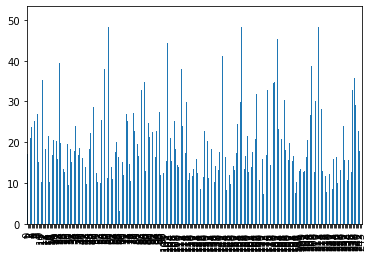

In [4]:
tips.total_bill.plot(kind='bar' )

In [5]:
tips.shape

(244, 7)

## Barplot

Generally, barplot is used to aggregate the categorical data based off some function.

Suppose we want to find out the average total bill paid by a male/female.

In [6]:
tips.groupby(['sex'])['total_bill'].mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

Suppose we want to set the X and Y labels, Title etc.

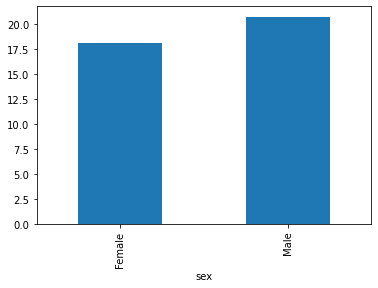

In [7]:
tips.groupby(['sex'])['total_bill'].mean().plot(kind='bar')

Text(0.5, 1.0, 'Mean Total Bill Gender wise')

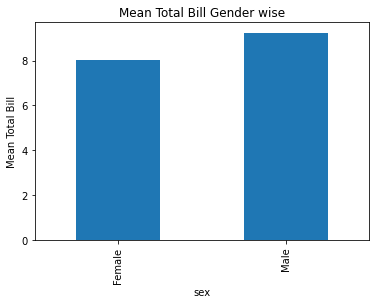

In [9]:
ax = tips.groupby(['sex']).mean()['total_bill'].plot(kind='bar')
ax.set_ylabel('Mean Total Bill')
ax.set_title('Mean Total Bill Gender wise')

##  Count plot

We want to know the number of male and female customers

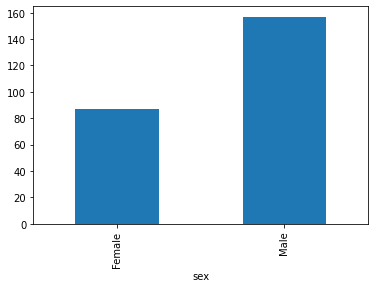

In [8]:
tips.groupby(['sex'])['total_bill'].count().plot.bar()

## Boxplots and Violinplots

Boxplots and Violinplots are used to shown the distribution of categorical data. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Suppose, we want to find out the distribution of total bill for each day of the week.

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


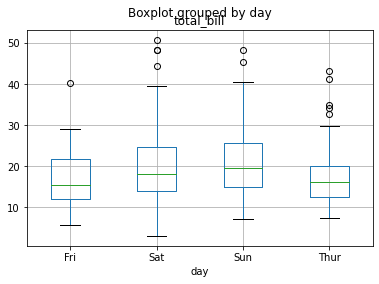

In [10]:
tips.boxplot(column='total_bill',by='day')

## Histogram

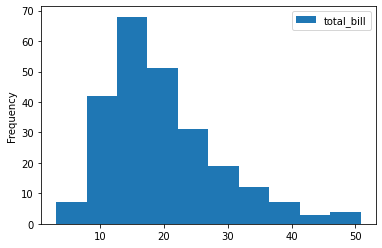

In [11]:
tips[['total_bill']].plot.hist(bins = 10)

## KDE plot

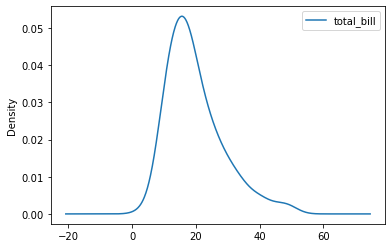

In [12]:
tips[['total_bill']].plot.kde()

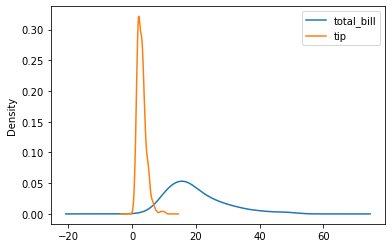

In [13]:
tips[['total_bill','tip']].plot.kde()

## Scatter Plot

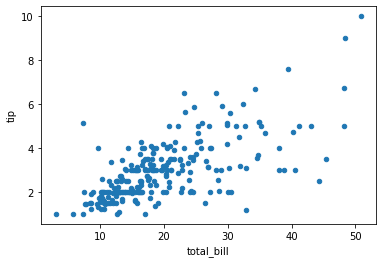

In [13]:
tips.plot.scatter(x='total_bill',y='tip')

## Matrix Plot

In [14]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F68BFBC190>,
      dtype=object)

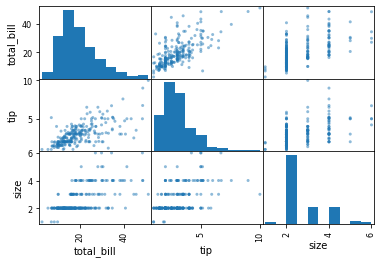

In [15]:
scatter_matrix(tips)

## Some Matplotlib Basics

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it.

To begin we create a figure instance. Then we can add axes to that figure:

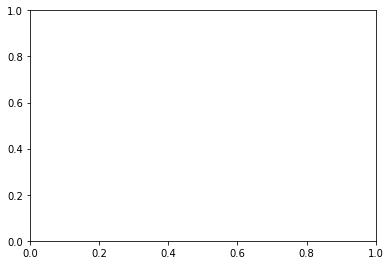

In [18]:
fig = plt.figure() # Create Figure (empty canvas)

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

In [16]:
x = np.linspace(0, 5, 11)
y = x ** 2

print (x)
print (y)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]


Text(0.5,1,'Set Title')

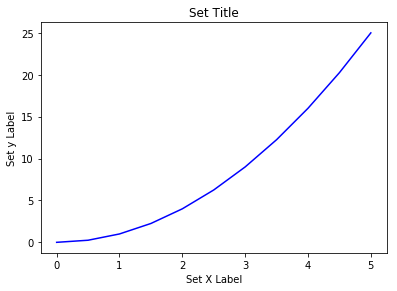

In [17]:

fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)


# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

In [21]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [22]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

Text(0.5,1,'title')

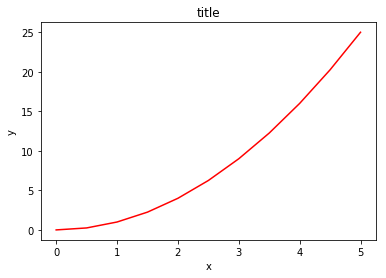

In [18]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Then you can specify the number of rows and columns when creating the subplots() object:

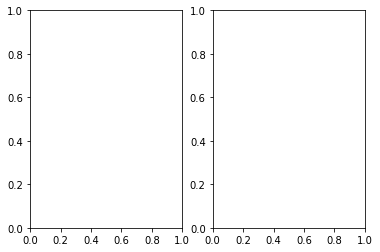

In [19]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [20]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe137bf09e8>,
      dtype=object)

We can iterate through this array:

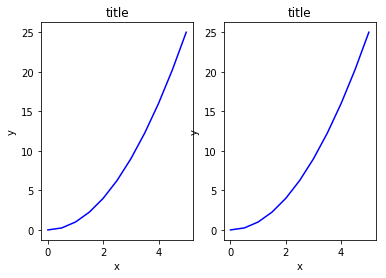

In [21]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

# Seaborn

Lets plot the same plots that we did earlier using Matplotlib.

In [16]:
import seaborn as sns
#%matplotlib inline

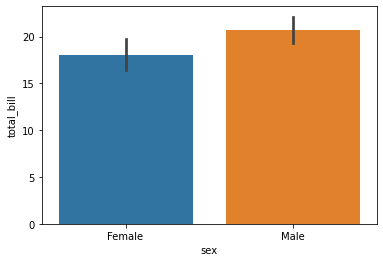

In [21]:
sns.barplot(x='sex',y='total_bill',data=tips)

By default, it aggregates on Mean. Suppose we want to change the aggregation function, then

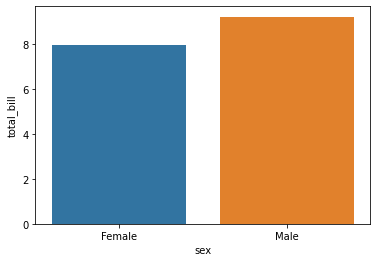

In [19]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std, ci = None)

## Count Plot using Seaborn

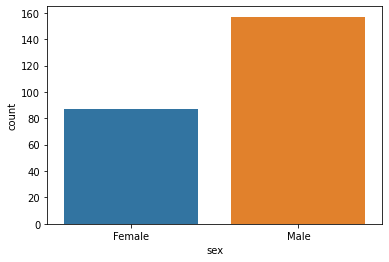

In [22]:
sns.countplot(x='sex',data=tips)

## Boxplots and Violinplots using Seaborn

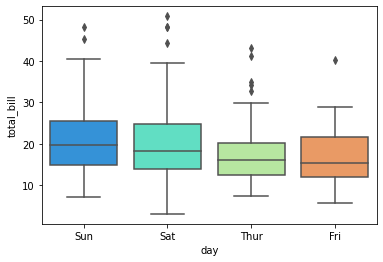

In [23]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

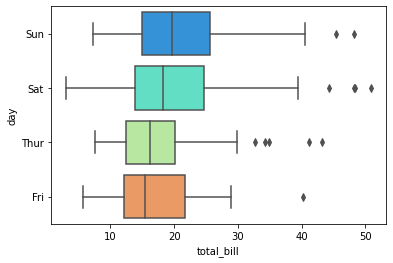

In [24]:
sns.boxplot(x="total_bill", y="day", data=tips,palette='rainbow')

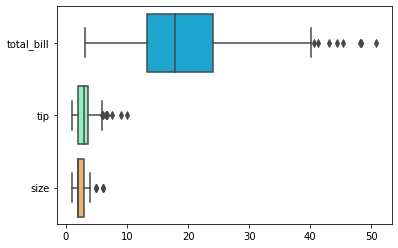

In [25]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

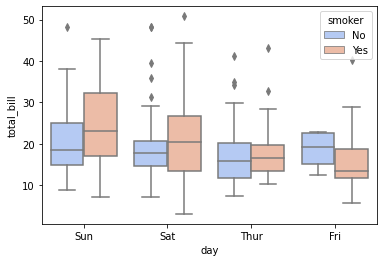

In [26]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

## Violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

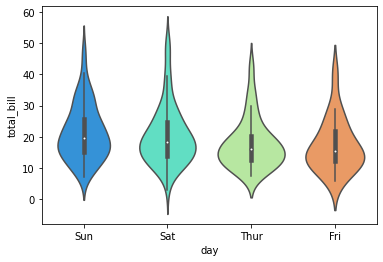

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

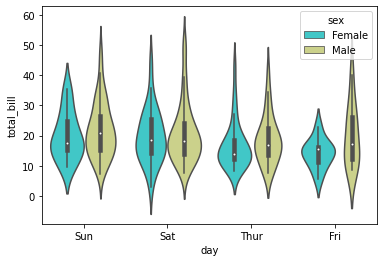

In [28]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='rainbow')

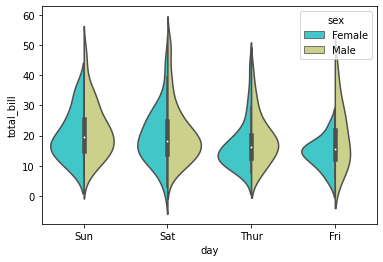

In [29]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='rainbow')

## Histogram using Seaborn

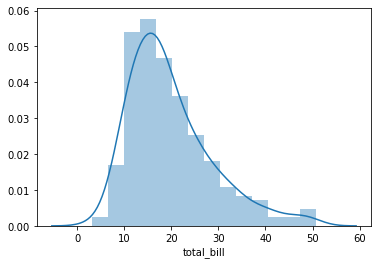

In [30]:
sns.distplot(tips['total_bill'])

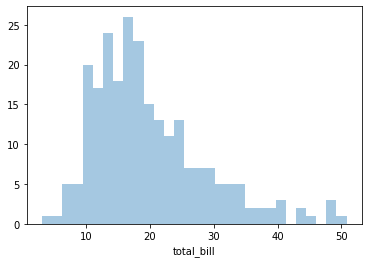

In [31]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

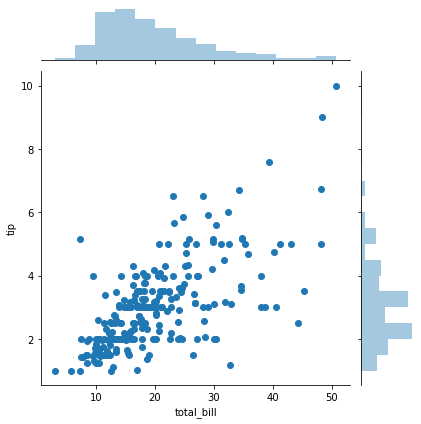

In [32]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

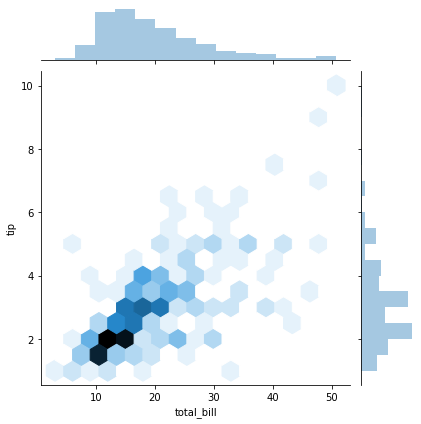

In [33]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

## Matrix Plot using Seaborn

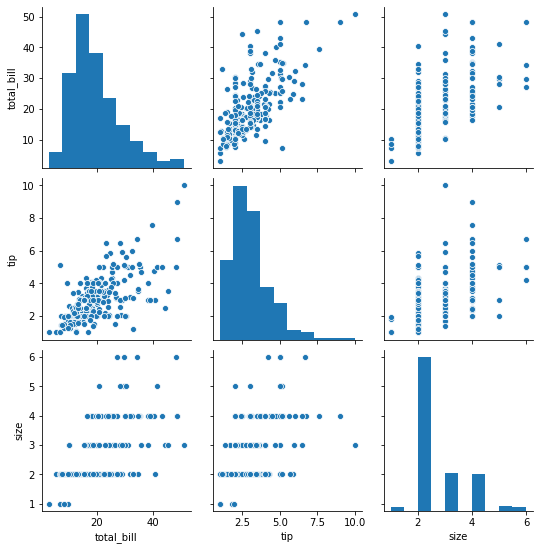

In [34]:
sns.pairplot(tips)

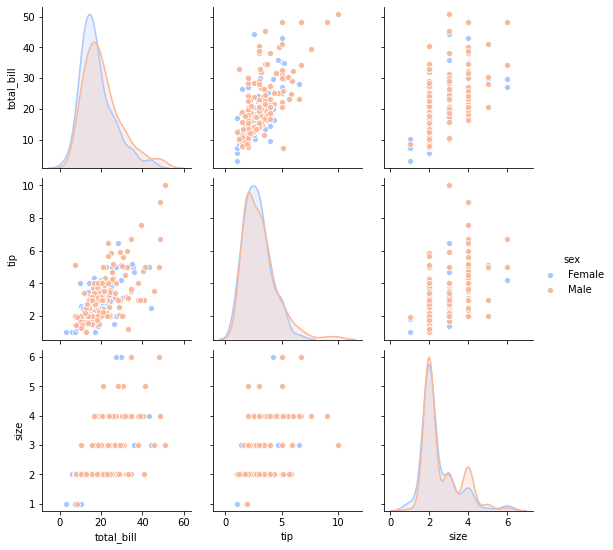

In [35]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

# Plotly

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

In [33]:
!conda install -c plotly plotly

^C


In [36]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.12.0


In [37]:
import cufflinks as cf

In [38]:
# For Notebooks
init_notebook_mode(connected=True)

In [39]:
# For offline use
cf.go_offline()

## BarPlots using Plotly

In [40]:
tips.groupby(['sex']).mean()['total_bill'].iplot(kind='bar')

### Count Plot using Plotly

In [41]:
tips.groupby(['sex']).count()['total_bill'].iplot(kind='bar')

## BoxPlot

In [42]:
import chart_studio.plotly as py
import plotly.graph_objs as go

x = tips['day'].values

trace0 = go.Box(
    y=tips['total_bill'].values,
    x=x,
    name='boxplot',
    marker=dict(
        color='#3D9970'
    )
)
data = [trace0]
layout = go.Layout(
    title='Box Plot',
    xaxis=dict(
        title='Total Bill',
        
    ),
    yaxis=dict(
        title='Day of the Week',
        
    ),
    #boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [43]:
import plotly
plotly.offline.plot(fig, filename='box.html')

'box.html'

## Histogram using Plotly

In [45]:
tips[['total_bill']].iplot(kind='hist', bins = 10)

## Scatter Plot using Plotly

In [46]:
tips.iplot(kind='scatter', x='total_bill',y='tip', mode='markers',size=10)

## Matrix Plot using Plotly

In [47]:
tips[['size','total_bill','tip']].scatter_matrix()